# Assignment 1

Assignment Link: https://brightspace.nyu.edu/d2l/le/lessons/405940/topics/10743319

Due Oct 1

Team 6

- Elaine Chan ec3704@nyu.edu

- Anne LaPerla ael9281@nyu.edu

- Peter Reno pr2227@nyu.edu

- Henry Post hp2376@nyu.edu





# Problem 1: Affine Cipher

```
c = (a * p + b) mod n
p = plaintext letter
c = ciphertext letter
a = encryption key
b = encryption key
n = modulus (26 for letters in english alphabet)
```



## 1a) ✅ size of key for a fixed modular n

Henry Post

> What is the key size for a fixed modular `n`?

We need to calculate Euler's Totient of `n` - which is `26` in this case.

26 factors as the primes $\{2,13\}$.

$$
φ(26) = 26 * (1-\frac{1}{2}) * (1-\frac{1}{13})
$$

$$
φ(26) = 26 * \frac{1}{2} * \frac{12}{13}
$$

$$
=12
$$



There are `12` possible values for `a`.

The key `b` can be an integer between `{0,n-1}`, so `{0,25}`, so `b=26`.

The key space is just `a*b` = `12*26` = `312`

$$=312$$

## 1b) ✅ Affine Cipher - send a message!

Henry Post

> Imagine you're a cryptographer tasked with sending a secure message using the Affine Cipher. Your message consists only of capital letters, and you've decided to use the encryption formula c = 5p+9 mod 26. Your challenge is to encrypt a given plaintext, ensuring that spaces and other non-letter characters are omitted, as the domain of your cipher is limited to 26 capital letters. Write a python program to encrypt the phrase “CRYPTOISFUN”. Develop a general solution that can be applied to any plaintext using the specified Affine Cipher encryption formula. Explain your process clearly.

encryption formula:

$$
c = 5p+9 \mod 26
$$

In [3]:
# Affine Cipher
# c = 5p + 9 mod 26
import typing
from typing import List

plaintext = 'CRYPTOISFUN'

# Function to compute modular inverse of a mod m using the extended Euclidean algorithm
def modular_inverse(a: int, m: int) -> int:
    # Using pow(a, -1, m) to compute the modular inverse
    # pow(a, -1, m) computes the modular inverse of a under modulo m
    return pow(a, -1, m)


# Encrypt one character by converting to its corresponding number and applying the Affine Cipher formula
def encrypt_one_integer(plaintext: int) -> int:
    return ((5 * plaintext) + 9) % 26

# Decrypt one character by applying the inverse Affine Cipher formula
def decrypt_one_integer(ciphertext: int) -> int:
    # Modular inverse of 5 mod 26 is 21
    a_inverse = modular_inverse(5, 26)
    return (a_inverse * (ciphertext - 9)) % 26


# Convert string to list of integers (A=0, B=1, ..., Z=25)
def string_to_int_list(string: str) -> List[int]:
    # Initialize an empty list to store the integers
    ints = []

    # Iterate over each character in the string
    for char in string:
        # Convert each character to its corresponding integer (A=0, ..., Z=25)
        int_value = ord(char) - ord('A')
        ints.append(int_value)

    return ints

# Convert list of integers to string (0=A, 1=B, ..., 25=Z)
def int_list_to_string(ints: List[int]) -> str:
    # Convert each integer back to its corresponding character
    char_list = [chr(i + ord('A')) for i in ints]

    # Join the list of characters into a single string
    return ''.join(char_list)

# Ensure string contains only uppercase ASCII characters
def filter_uppercase_ascii(s: str) -> str:
    # Filter out any non-uppercase ASCII characters
    uppercase_chars = [char for char in s if char.isupper()]

    # Join the list of uppercase characters into a single string
    return ''.join(uppercase_chars)


# Encrypt the entire plaintext using the Affine Cipher formula
def encrypt_string(plaintext: str) -> str:

    # make sure it's in uppercase
    plaintext = plaintext.upper()

    # make sure only uppercase ASCII characters are in the string
    plaintext = filter_uppercase_ascii(plaintext)

    plaintext_int_list = string_to_int_list(plaintext)  # Convert string to list of integers
    encrypted_integers = [encrypt_one_integer(n) for n in plaintext_int_list]  # Encrypt each integer
    return int_list_to_string(encrypted_integers)  # Convert back to letters

# Decrypt the entire ciphertext using the Affine Cipher formula
def decrypt_string(ciphertext: str) -> str:
    # Convert the ciphertext string to a list of integers
    encrypted_ints = string_to_int_list(ciphertext)
    decrypted_ints = [decrypt_one_integer(c) for c in encrypted_ints]  # Decrypt each integer
    return int_list_to_string(decrypted_ints)  # Convert back to letters

# print plaintext
print("plaintext:            "+plaintext)

# Test our plaintext
encrypted_text = encrypt_string(plaintext)
print(f"ciphertext:           {encrypted_text}")

# Decrypt the ciphertext
decrypted_text = decrypt_string(encrypted_text)
print(f"Decrypted ciphertext: {decrypted_text}")


plaintext:            CRYPTOISFUN
ciphertext:           TQZGABXVIFW
Decrypted ciphertext: CRYPTOISFUN


## 1c) ✅ Eve interception

Ciphertext: QJKESREOGHGXXREOXEO

PlainText: IFYOUBOWATALLBOWLOW

Let an affine cipher be defined by the equiation C = (A * p + b) modulo m
Let C, A, p, b, m be elements of Z (the set of integers) Where p corresponds to the order of the corresponding integer for a A letter (e.g. A = 0, B = 1, etc), and C is integer corresponding to the
encrypted letter.

We are given the letter 'T' is encrypted to 'H' and 'O' to 'E', we also know that m = 26 because the affine cipher uses every letter of the alphabet. Therefore we know: 19 -> 7, 14 -> 4 and can create the following equations:

    7 = (19A + b) mod 26
    4 = (14A + b) mod 26

Because addition and multiplication are well-defined under modulus operation, we know the following:

    [a]m + [b]m = [a+b]m 
    [a]m * [b]m = [ab]m 

where [a] and [b] are the representative congruence classes modulo m, containing the set of all integers x,y satisfying the equations: 
x mod m = a and y mod m = b. 

This mathematical property allows us to rearrange the equations as follows to solve for A. 

    7 - 4 = [(19A + b) mod 26] - [(14A + b) mod 26]
    3 = 19A mod 26 - 15A mod 26
    3 = 5A mod 26

For the affine cipher to be able to both encrypt and decrypt, the modulo multiplicative inverse must exist. This occurs when A and m and relatively prime (the only factor they have in common is 1). Therefore, we know the only possible values of A are: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25.

The value of A can be obtained by trying each of these values until we satisfy:

    3 = 5 * A mod 26
    A = 11


With A = 11, we can now solve for b using the encryption equations for either of the known values:

    4 = (14 * 11 + b) mod 26
    4 = (154) mod 26 + b mod 26
    4 = 24 + b mod 26
    b = 6


With the value of A and b known, there are two options to decrypt the message. You can either using C = 11p + 6 to encrypt 0 - 25, yielding 
the following key: GRCNYJUFQBMXITEPALWHSDOZKV. Stated differently:

    G = A
    R = B
    C = C
    ...
    Z = X
    K = Y
    V = Z

This can now be used to look up the corresponding letters to decrypt the message. 

Alternatively, we can use a decryption function. Now that we know the value of A and b, and that A is relatively prime to m,
 we can use the modulo multiplicative inverse, or A' (said A-prime, or A-inverse), a value such at (A * A') mod 26  = 1. 
 Again because both ddition and multiplication modulo m are well-defined (both one-to-one and onto), 
 we can use the encryption formula, C = (A * p + b) mod m to derive:

    P = [A' * (c - b)] mod m

for example, using our known values, we can verify:

    [19 * (4 - 6)] mod 26 = 14
    [19 * (7 - 6)] mod 26 = 19
Where 4 is the integer representation of E, the ciphertext of plaintext O. 

Mapping the ciphertext according to A = 0, B = 1, etc. yeilds the following  cipher stated both alphabetically and in integer form:

    Q  - J - K  - E - S  - R  - E - O  - G - H - G - X  - X  - R  - E - O  - X  - E  - O 

    16 - 9 - 10 - 4 - 18 - 17 - 4 - 14 - 6 - 7 - 6 - 23 - 23 - 17 - 4 - 14 - 23 - 4 - 14 

plugging into our formula yields:

    [19 * (16 - 6)] mod 26 = 8 = I 
    [19 * (9  - 6)] mod 26 = 15 = F
    ...
    [19 * (14 - 6)] mod 26 = 22 = W

Ultimately yielding plainText: IFYOUBOWATALLBOWLOW


In [4]:
# Cracking Affine Cipher
# c = Ap + b mod 26

#letter 'T' is encrypted to 'H' and 'O' to 'E'.

import typing
from typing import List

ciphertext = 'QJKESREOGHGXXREOXEO'
plaintext = 'CRYPTOISFUN'

# plaintext_from_ciphertext = {}
# plaintext_from_plainint = {}
# plaintext_from_cipherInt = {}

ciphertext_from_plaintext = { "T":"H", "O":"E"}
# ciphertext_from_cipherInt = {}
# ciphertext_from_plainInt = {}

plainInt_from_plaintext = {}
# plainInt_from_ciphertext = {}
# plainInt_from_cipherInt = {}

cipherInt_from_plaintext = {}
# cipherInt_from_ciphertext = {}
# cipherInt_from_plainInt = {}


# Function to compute modular inverse of a mod m using the extended Euclidean algorithm
def modular_inverse(a: int, m: int) -> int:
    # Using pow(a, -1, m) to compute the modular inverse
    # pow(a, -1, m) computes the modular inverse of a under modulo m
    return pow(a, -1, m)


# Encrypt one character by converting to its corresponding number and applying the Affine Cipher formula
def encrypt_one_integer(affine_a,affine_b,plaintext: int) -> int:
    return ((affine_a * plaintext) + affine_b) % 26

# Decrypt one character by applying the inverse Affine Cipher formula
def decrypt_one_integer(affine_a,affine_b,ciphertext: int) -> int:
    # Modular inverse of 5 mod 26 is 21
    a_inverse = modular_inverse(affine_a, 26)
    return (a_inverse * (ciphertext - affine_b)) % 26


# Convert string to list of integers (A=0, B=1, ..., Z=25)
def string_to_int_list(string: str) -> List[int]:
    # Initialize an empty list to store the integers
    ints = []

    # Iterate over each character in the string
    for char in string:
        # Convert each character to its corresponding integer (A=0, ..., Z=25)
        int_value = ord(char) - ord('A')
        ints.append(int_value)

    return ints

# Convert list of integers to string (0=A, 1=B, ..., 25=Z)
def int_list_to_string(ints: List[int]) -> str:
    # Convert each integer back to its corresponding character
    char_list = [chr(i + ord('A')) for i in ints]

    # Join the list of characters into a single string
    return ''.join(char_list)

# Ensure string contains only uppercase ASCII characters
def filter_uppercase_ascii(s: str) -> str:
    # Filter out any non-uppercase ASCII characters
    uppercase_chars = [char for char in s if char.isupper()]

    # Join the list of uppercase characters into a single string
    return ''.join(uppercase_chars)


# Decrypt the entire ciphertext using the Affine Cipher formula
def decrypt_string(affine_a, affine_b,ciphertext: str) -> str:
    # Convert the ciphertext string to a list of integers
    encrypted_ints = string_to_int_list(ciphertext)
    decrypted_ints = [decrypt_one_integer(affine_a,affine_b,c) for c in encrypted_ints]  # Decrypt each integer
    return int_list_to_string(decrypted_ints)  # Convert back to letters


def solve_encryption():   
    
    #Map the known information to integer value / set up all the dictionaries
    affine_A = 0 
    affine_b = 0 
    for keys in ciphertext_from_plaintext:
        p = keys
        pInt = string_to_int_list(p)[0]

        c = ciphertext_from_plaintext[p]
        cInt = string_to_int_list(c)[0]


        # plaintext_from_ciphertext[c] = p
        # plaintext_from_plainint[pInt]=p
        # plaintext_from_cipherInt[cInt]=p

        # #ciphertext_from_plaintext = {
        # ciphertext_from_cipherInt[cInt]=c
        # ciphertext_from_plainInt[pInt]=c

        plainInt_from_plaintext[p]=pInt
        # plainInt_from_ciphertext[c]=pInt
        # plainInt_from_cipherInt[cInt]=pInt

        cipherInt_from_plaintext[p]=cInt
        # cipherInt_from_ciphertext[c]=cInt
        # cipherInt_from_plainInt[pInt]=cInt    

    '''
    the conguence class of a mod 26 is well defined under multiplication and division
    [a] mod 26 + [b] mod 26 = [a+b] mod 26 
    and 
     [a] mod 26 * [b] mod 26 = [ab] mod 26 

     we can we can rearrange  C = (Ap + b) mod 26 
    C = A mod 26 * p mod 26 + b mod 26
    yielding

    A mod 26 * p1 mod 26 + b mod 26 - (A mod 26 * p2 mod 26 + b mod 26) = C2 - C1, allowing us to solve for the value of A used in 
    encryption.

    and further simplified to

    A mod 26 * (p1 - p2) = c1 - c2 

    '''
    factor = (plainInt_from_plaintext["T"] - plainInt_from_plaintext["O"]) 
    c1minusc2 = cipherInt_from_plaintext["T"] - cipherInt_from_plaintext["O"]

    #Now we know that A * factor modulu 26 is equivalent to c1minusc2 e.g. we can try values
    #for A 5A mod 26 = 3 and we can try values for A. 
    i = 0
    r = 0

    while r != c1minusc2:      
       r = (factor * i) % 26
       affine_A = i
       i += 1

    #Now that we have A we can solve for b:
    i = 0
    x = (affine_A * plainInt_from_plaintext["T"]) % 26
    while True:
        x2 = x + (i % 26)
        if(x2 % 26 == cipherInt_from_plaintext["T"]):
            affine_b = i
            break
        i += 1

    return [affine_A,affine_b]

affine_Ab_values = solve_encryption()

decrypted_text = decrypt_string(affine_Ab_values[0], affine_Ab_values[1],ciphertext)
print(f"Decrypted ciphertext: {decrypted_text}")

Decrypted ciphertext: IFYOUBOWATALLBOWLOW


# Problem 2: Frequency Analysis

Alice has crafted a message for Bob using a simple substitution cipher. The encrypted message, 
segmented is `TNFOS FOZSW PZLOC GQAOZ WAGQR PJZPN ABCZP QDOGR AMTHA RAXTB 
AGZJO GMTHA RAVAP ZW`, where spaces are not part of the original encryption and are added only 
for convenience. Eve, who has intercepted the message, knows that the word `liberty` appears somewhere 
in the plaintext.



## 2a) ✅ Size of key space
### Problem 2 Frequency Analysis
Alice has crafted a message for Bob using a simple substitution cipher. The encrypted message,
segmented is "TNFOS FOZSW PZLOC GQAOZ WAGQR PJZPN ABCZP QDOGR AMTHA RAXTB
AGZJO GMTHA RAVAP ZW", where spaces are not part of the original encryption and are added only
for convenience. Eve, who has intercepted the message, knows that the word "liberty" appears somewhere
in the plaintext.

2a) Calculate the Size of the Key Space. Explain how the key space is calculated and its implications for
the cipher's security.

Determining the size of the Key Space is an exercise in both determining the algorithm used for encyption as well as determining the length of the key space.  Frequency Analysis of a ciphertext can be used to determine the plaintext when a simple substitution cipher is used, such as with Mono-alphabetic Substitution Ciphers. Given that English has 26 letters in the English alphabet there are 26! factorial possible permutations of these letters.

Our first approach was to attempt using the Caesar Cipher as each shift of the alphabet is straightforward to validate for a possible solution. After confirming a Caesar Cipher was not used, we moved used Frequency Analysis of the message and tried swapping the most frequent occuring letters with the letters that appear most frequently in the Enlish language. In the ciphertext, the two most common letters were Z and A. In English the letters E and T are two of the most common letters, so we looked for places in the message where Z and A were close enough that they could map to Liberty in a plaintext message.

To speed up the process of iterating through each possible letter we created a python program which would use a map to swap the placement of a letter in the cipher text for a letter in the plaintext. Through a lot of trial and error, we eventually determined the message was, "I KNOW NOT WHAT COURSE OTHERS MAY TAKE BUT AS FOR ME GIVE ME LIBERTY OR GIVE ME DEATH". 

## 2b) ✅ Decrypt with only knowledge of "liberty"
Given Eve's knowledge that the word "liberty" is in the plaintext, devise a strategy to decrypt the
message. This task requires analyzing the ciphertext, making educated guesses, and testing hypotheses
about the cipher's key. Your goal is to uncover the original message sent by Alice to Bob. You solve it
manually.

To decode the message, we created a python program which would swap letters in the ciphertext to decode the plaintext message. By swapping out the most common letters in the English language we were able to iterative decode the message until we found the full plaintext phrase which was made famous by the American Revolution leader Patrick Henry, "I KNOW NOT WHAT COURSE OTHERS MAY TAKE BUT AS FOR ME GIVE ME LIBERTY OR GIVE ME DEATH"

In [5]:
def decipher_with_key(ciphertext, key_map):
    # Replace each letter in ciphertext using key_map (a dictionary)
    return ''.join(key_map.get(char, char) for char in ciphertext)

# message to decrypt
ciphertext = "T NFOS FOZ SWPZ LOCGQA OZWAGQ RPJ ZPNA BCZ PQ DOG RA MTHA RA XTBAGZJ OG MTHA RA VAPZW"

# unused variable to track progress that has been made on the message
plaintext  = "I KNOW NOT WHAT COURSE OTHERS MAY TAKE BUT AS FOR ME GIVE ME LIBERTY OR GIVE ME DEATH"

key_map = {
    'A': 'E',
    'B': 'B',
    'C': 'U',
    'D': 'F',
    'F': 'N',
    'G': 'R',
    'H': 'V',
    'J': 'Y',
    'L': 'C',
    'M': 'G',
    'N': 'K',
    'O': 'O',
    'P': 'A',
    'Q': 'S',
    'R': 'M',
    'T': 'I',
    'S': 'W',
    'V': 'D',
    'W': 'H',
    'X': 'L',
    'Z': 'T',    
}

# Decipher using established key map
deciphered_text = decipher_with_key(ciphertext, key_map)
print("Deciphered Text:", deciphered_text)

Deciphered Text: I KNOW NOT WHAT COURSE OTHERS MAY TAKE BUT AS FOR ME GIVE ME LIBERTY OR GIVE ME DEATH


# Problem 3: Understanding and Analyzing the Enigma Machine

## 3a) ✅ Assess and calculate the size of the key space of the Enigma machine.
Assess and calculate the size of the key space of the Enigma machine. Consider all elements that contribute to the key space: rotor wiring, ring settings, rotor stepping, reflector choices, plugboard configurations, and the initial position of rotors.

### Rotor Selection = 360 possiblilities
- Choosing 3 rotors from 5, `5 choose 3 = 60` possible combinations.
- Rotors can be arranged in `3! = 6` possible orders
- total possibilities = `6 * 60 = 360`

### Ring Settings = 17576 possiblilities
- Each rotor can be set to one of 26 starting positions (corresponding to the number of letters in the alphabet).
- For 3 rotors, there are `26 * 26 * 26 = 17576` possible rotor positions.

### Initial Rotor Positions = 17576 possiblilities (not included)
- This pertains to ring settings; the initial rotor positions does not change the fact that there are `26 * 26 * 26 = 17576` possible rotor positions
- If we include this number in the calculation, we will be duplicating the counting already done in Ring Settings.

### Rotor Stepping = 676 possibilities (not included)
- Each time the first rotor has turned 26 times, the second one turns once.
- Each time the second rotor turned 26 times, the third one turns once.
- The possible combination is `26 * 26 = 676`
- If we include this number in the calculation, we will be duplicating the counting already done in Ring Settings.

### Rotor Wiring: Reflector Choices = 403291461126605635584000000 possibilties
- Let's assume all each letter is wired to a different one inside the rotor.
- For each rotor, let's first consider letter A. We can select 1 out of 26 letters to change to. The next letter, we can select 1 out of 25 letters. The internal wiring of each rotor is `26! = 403291461126605635584000000` and does not change once wired.

### Plugboard configurations = 150738274937250 possibilities
- The standard German Enigma used 10 plug cables. The total number of combinations will be `150738274937250`:

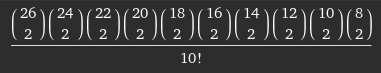

### Total Key Space
- Multiplying all components together:
- `360 * 17576 * 403291461126605635584000000 * 150738274937250`
- The number is `3.8464944694929552783672937124849516544 * 10**47`
- 
image.png

### References
- Lecture notes
- https://chrispiech.github.io/probabilityForComputerScientists/en/examples/enigma/
- https://mathbehindtheimitationgame.wordpress.com/2015/03/11/part-4-decoding-the-ciphertext-machine/
- https://brilliant.org/wiki/enigma-machine/
- https://www.ciphermachinesandcryptology.com/en/enigmatech.htm#steppingmechanism
- https://cnitarot.github.io/courses/cs355_Fall_2012/355_2012_lect4.pdf

## 3b) ✅ Explanation of enigma machine's code flow

> Refer to the manual at https://py-enigma.readthedocs.io/_/downloads/en/latest/pdf/ Here is one code
sample for enigma machine. Provide an explanation of the Enigma machine's code flow based on the
given code using box (workflow) diagram. Just in case, you know you need to install the package using
pip install py-enigma in term or !pip install py-enigma in jupyter notebook.



![3b image](3b.jpg)

In [6]:
!pip install py-enigma

from enigma.rotors.rotor import Rotor
from enigma.plugboard import Plugboard
from enigma.machine import EnigmaMachine

rL = Rotor('my rotor1', 'EKMFLGDQVZNTOWYHXUSPAIBRCJ', ring_setting=0, stepping='Q')
rM = Rotor('my rotor2', 'BDFHJLCPRTXVZNYEIWGAKMUSQO', ring_setting=5, stepping='V')
rR = Rotor('my rotor3', 'ESOVPZJAYQUIRHXLNFTGKDCMWB', ring_setting=10, stepping='J')

reflector = Rotor('my reflector', 'YRUHQSLDPXNGOKMIEBFZCWVJAT')

pb = Plugboard.from_key_sheet('AK BZ CG DL FU HJ MX NR OY PW')

machine = EnigmaMachine([rL, rM, rR], reflector, pb)

machine.set_display('UPS') # set rotor positions or use its default

position = machine.get_display() # read rotor position

print(position)
# Encrypt A letter

# print(machine.key_press('C'))
# Encrypt a text

print(machine.process_text('Enigma machine is powerful for Q'))



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
UPS
TTXOPNHJCINQGNOVGMGIAKVPHOZDWZAY


## 3c) ✅ Test the code with different key configurations, altering various aspects like wiring, ring settings, stepping mechanisms, reflector types, plugboard presence, and initial display positions. No Submission.


[No submission]

## 3d) ✅ Test and observe the outcome when the plaintext has numbers or special characters.

Test and observe the outcome when the plaintext has numbers or special characters. Write your observations. Suggest ways to improve the mechanism encryption.

Let's say we want to transmit the following message:

_**'The Company posted quarterly revenue of $85.8 billion, up 5%.'**_

(From Apple's latest quarterly [earnings report](https://www.apple.com/newsroom/2024/08/apple-reports-third-quarter-results/))

The key pieces of information in this message are _**$85.8 billion**_ and _**up 5%**_, which will be completely lost in the encrypt/decrypt process due to the way the code replaces numeric and special characters.


In [7]:
import string
print(f'Characters recognized by Enigma: {string.ascii_uppercase}')

Characters recognized by Enigma: ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [8]:
!pip install py-enigma
from enigma.rotors.rotor import Rotor
from enigma.plugboard import Plugboard
from enigma.machine import EnigmaMachine

rL = Rotor('my rotor1', 'EKMFLGDQVZNTOWYHXUSPAIBRCJ', ring_setting=0, stepping='Q')
rM = Rotor('my rotor2', 'BDFHJLCPRTXVZNYEIWGAKMUSQO', ring_setting=5, stepping='V')
rR = Rotor('my rotor3', 'ESOVPZJAYQUIRHXLNFTGKDCMWB', ring_setting=10, stepping='J')

reflector = Rotor('my reflector', 'YRUHQSLDPXNGOKMIEBFZCWVJAT')
pb = Plugboard.from_key_sheet('AK BZ CG DL FU HJ MX NR OY PW')

machine = EnigmaMachine([rL, rM, rR], reflector, pb) # Params = rotors, reflector, plugboard
machine.set_display('UPS') # set rotor positions or use its default

# Start encrypting process
print('Start encrypting process...')
msg_key = 'BLA'
print(f'msg_key = {msg_key}')
enc_key = machine.process_text(msg_key)
print(f'enc_key = {enc_key}')
machine.set_display(msg_key)

position = machine.get_display() # read rotor position
print(position)

def process(machine, text):
  msg = machine.process_text(text)
  print(msg)
  return msg

plaintext = 'The Company posted quarterly revenue of $85.8 billion, up 5%.'
print('Cipher text is:')
ciphertext = process(machine, plaintext)

# Start decrypting process
print('Start decrypting process...')
machine.set_display('UPS')
decrypt_key = machine.process_text(enc_key)
machine.set_display(decrypt_key)
print('Decrypted plaintext is:')
plaintext = process(machine, ciphertext)


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Start encrypting process...
msg_key = BLA
enc_key = AVF
BLA
Cipher text is:
EEMZFCVZZXFHMWDNAOALSTYOVMUPHAYDOEOQNJGLEMQQJBGZVFFCEKPBGOTWE
Start decrypting process...
Decrypted plaintext is:
THEXCOMPANYXPOSTEDXQUARTERLYXREVENUEXOFXXXXXXXBILLIONXXUPXXXX


The output of the above code should be:

Start encrypting process...
msg_key = BLA
enc_key = AVF
BLA
Cipher text is:
EEMZFCVZZXFHMWDNAOALSTYOVMUPHAYDOEOQNJGLEMQQJBGZVFFCEKPBGOTWE
Start decrypting process...
Decrypted plaintext is:
THEXCOMPANYXPOSTEDXQUARTERLYXREVENUEXOFXXXXXXXBILLIONXXUPXXXX

As you can see, the decrypted message completely ommited the numeric figures, which are the critical pieces of information in the message.

Any of the 26 letters of the alphabet are kept intact, and everything else get replaced.

This is the part of the source code that replaces special characters. It either replaces all non-alphabetic characters with the same character or removes it from the string altogether.

Here, the variable `KEYBOARD_SET` is `string.ascii_uppercase` which yields the string `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`.

```python
    def process_text(self, text, replace_char='X'):
        """Run the text through the machine, simulating a key press for each
        letter in the text.

        text - the text to process. Note that the text is converted to upper
        case before processing.

        replace_char - if text contains a character not on the keyboard, replace
        it with replace_char; if replace_char is None the character is dropped
        from the message

        """
        result = []
        for key in text:
            c = key.upper()

            if c not in KEYBOARD_SET:
                if replace_char:
                    c = replace_char
                else:
                    continue    # ignore it

            result.append(self.key_press(c))

        return ''.join(result)
```

A better way to handle this would be to include special characters as part of the rotor and plugboard characters list, and process them through the entire Enigma workflow as you would process any alphabetic character. That would ensure the integrity of the message and prevent the message from being corrupted or misinterpreded, in case the non-alphabetic characters are critical.

## 3e) ✅ Ciphertext intercepted!

The codebreakers at Bletchley Park have intercepted a ciphertext
“WVUVJCSQBFLEJGFNIZNIGYGOCWSUVNCIIIA” which they know corresponds to the plaintext
“ATTACKXATXXXXXXATXATLANTICXZXISLAND”. It sounds like “ATTACKxATxxxxxx
ATLANTICxZxISLAND”. Your challenge is to determine the initial rotor display position used to
encrypt this message programmatically. Use your code to simulate the Enigma machine and discover the
initial settings.

In [9]:
#!pip install py-enigma
from enigma.rotors.rotor import Rotor
from enigma.plugboard import Plugboard
from enigma.machine import EnigmaMachine
from typing import List


def run_enigma(initial_display,message):
    #stepping is the notch
    rL = Rotor('my rotor1', 'EKMFLGDQVZNTOWYHXUSPAIBRCJ', ring_setting=0, stepping='Q') 
    rM = Rotor('my rotor2', 'BDFHJLCPRTXVZNYEIWGAKMUSQO', ring_setting=5, stepping='V')
    rR = Rotor('my rotor3', 'ESOVPZJAYQUIRHXLNFTGKDCMWB', ring_setting=10, stepping='J')

    reflector = Rotor('my reflector', 'YRUHQSLDPXNGOKMIEBFZCWVJAT')
    pb = Plugboard.from_key_sheet('AK BZ CG DL FU HJ MX NR OY PW')

    machine = EnigmaMachine([rL, rM, rR], reflector, pb) # Params = rotors, reflector, plugboard
    machine.set_display(initial_display) # set rotor positions or use its default

    c = machine.process_text(message)
    return c

def int_list_to_string(ints: List[int]) -> str:
    # Convert each integer back to its corresponding character
    char_list = [chr(i + ord('A')) for i in ints]
    # Join the list of characters into a single string
    return ''.join(char_list)

if __name__ == '__main__':
    #m = 'Enigma machine is powerful for Q'
    m = 'WVUVJCSQBFLEJGFNIZNIGYGOCWSUVNCIIIA'
    m2 = 'ATTACKXATXXXXXXATXATLANTICXZXISLAND'
    print('\nm = ',m)
    found = False

    #Run through all combinations of initial settings

    #numerical representations (A=0,etc) for initial position for rL (i), rM (j), RR (k)
    i = 0 
    j = 0 
    k = 0
    
    while k < 26: #while third rotor hasnt exhausted all positions
        #convert the numbers to a list and store as a string
        #mod 26 to avoid resetting values to zero each rotor cycles through its initital position
        initial_settings = str(int_list_to_string([i%26,j%26,k%26]))

        #pass the string into the run enigma with the message
        result = run_enigma(initial_settings,m)
        
        if(result == m2): #Check the result against the known value
            found = True
            break #if a match is found stop looking

        i += 1 #otherwise keep incrementing until we try all 3 letter combinations
        if(i > 0 and i % 26 == 0):
            j += 1 
        if(j > 0 and j % 26 == 0):
            j = 0
            k += 1

    #output
    if(found):
        print("************************INITIAL SETTINGS FOUND after ",i," cycles:  ",initial_settings)
    else:
        print("All initial settings searched")


    




m =  WVUVJCSQBFLEJGFNIZNIGYGOCWSUVNCIIIA
************************INITIAL SETTINGS FOUND after  14157  cycles:   NYU
